In [287]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [288]:
movies = "../data/movie_lens_big/movies.csv"
ratings = "../data/movie_lens_big/ratings.csv"

In [289]:
df_movies = pd.read_csv(movies, dtype={"title":"str", "genres":"str"})
df_ratings = pd.read_csv(ratings)

In [290]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58098 entries, 0 to 58097
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  58098 non-null  int64 
 1   title    58098 non-null  object
 2   genres   58098 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.3+ MB


In [291]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27753444 entries, 0 to 27753443
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 847.0 MB


In [292]:
df_movies.head(5000)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
4995,5090,"Hunchback of Notre Dame, The (Notre Dame de Pa...",Drama
4996,5091,The Man from Acapulco (1973),Action|Comedy|Fantasy|Romance
4997,5092,Big Fat Liar (2002),Children|Comedy
4998,5093,Collateral Damage (2002),Action|Thriller


In [293]:
df_movies["genres"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 58098 entries, 0 to 58097
Series name: genres
Non-Null Count  Dtype 
--------------  ----- 
58098 non-null  object
dtypes: object(1)
memory usage: 454.0+ KB


In [294]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


In [295]:
# dropping userId and timestamp from the dataframe
df_ratings = df_ratings.drop(["userId", "timestamp"], axis=1)
df_ratings.head()

,movieId,rating
0,307,3.5
1,481,3.5
2,1091,1.5
3,1257,4.5
4,1449,4.5


In [296]:
df_movies["year"] = df_movies.title.str.extract("\((\d{4})\)").replace(np.nan, "0").astype("int64") # extracting the year from title and creating new column 
df_movies["title"] = df_movies["title"].str.replace("\d+", '').str.replace(r"\(.*\)","") # This removes year from title



df_movies.head()

C:\Users\Sam Glass ITHS\AppData\Local\Temp\ipykernel_3828\3756239443.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_movies["title"] = df_movies["title"].str.replace("\d+", '').str.replace(r"\(.*\)","") # This removes year from title


,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


In [297]:
dummies = df_movies["genres"].str.get_dummies(sep="|") # This seperates all the genres into columns with 1 meaning true
df_movies_genre_split = pd.concat([df_movies, dummies], axis=1)

df_movies_genre_split.head()

,movieId,title,genres,year,(no genres listed),Action,Adventure,Animation,Children,Comedy,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji,Adventure|Children|Fantasy,1995,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,Comedy|Romance,1995,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II,Comedy,1995,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [298]:
# making a mean average rating of the movies from movie id and rating
average_rating = df_ratings.groupby("movieId")["rating"].mean().reset_index().round(decimals=1)
average_rating.rename(columns={"rating":"av_rating"}, inplace=True)
average_rating.head()

,movieId,av_rating
0,1,3.9
1,2,3.2
2,3,3.2
3,4,2.9
4,5,3.1


In [299]:
amount_ratings = df_ratings[["movieId", "rating"]].value_counts(subset=["movieId"]).to_frame(name="Total ratings").reset_index()
amount_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53889 entries, 0 to 53888
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   movieId        53889 non-null  int64
 1   Total ratings  53889 non-null  int64
dtypes: int64(2)
memory usage: 842.1 KB


In [306]:
# while looking at the years of the data you can see that there are some that are not real years
# I have decided that I will only have movies between 1939 and 2022 as 1939 was the real revolution of color films
# such as The wizard of Oz. 
df_complete_movie = df_movies.merge(average_rating, on="movieId").merge(amount_ratings, on="movieId")
df_complete_movie = df_complete_movie.sort_values(by=["year"], ascending=True)
df_complete_movie.head()

,movieId,title,genres,year,av_rating,Total ratings
48583,180455,The End?,Horror,0,3.0,1
42117,165237,Amber Alert,(no genres listed),0,3.3,5
52212,189325,The Change,Drama,0,3.5,1
42157,165345,Pad Yatra: A Green Odyssey,Adventure|Documentary,0,3.0,1
52114,189047,Veras Mantel,(no genres listed),0,1.0,1


In [307]:
df_complete_movie = df_complete_movie[(df_complete_movie['year'] > 0)]
df_complete_movie.head()

,movieId,title,genres,year,av_rating,Total ratings
35783,148054,Passage de Venus,Documentary,1874,2.6,10
35780,148048,Sallie Gardner at a Gallop,(no genres listed),1878,2.9,14
42738,166800,Buffalo Running,(no genres listed),1883,2.3,5
35776,148040,Man Walking Around a Corner,(no genres listed),1887,1.8,9
48600,180503,Pferd und Reiter Springen Über ein Hindernis,Documentary,1888,1.5,2


### Now i will do some exploitative plots on my complete dataset

b)

In [302]:
# creating a dataframe with top ten movies with highest ratings. 
top_ten_most_rate = df_complete_movie.sort_values(by=["Total ratings"], ascending=False, inplace=True)
top_ten_most_rate = df_complete_movie[:10]
top_ten_most_rate

,movieId,title,genres,year,av_rating,Total ratings
315,318,"Shawshank Redemption, The",Crime|Drama,1994,4.4,97999
352,356,Forrest Gump,Comedy|Drama|Romance|War,1994,4.1,97040
293,296,Pulp Fiction,Comedy|Crime|Drama|Thriller,1994,4.2,92406
587,593,"Silence of the Lambs, The",Crime|Horror|Thriller,1991,4.2,87899
2487,2571,"Matrix, The",Action|Sci-Fi|Thriller,1999,4.1,84545
257,260,Star Wars: Episode IV - A New Hope,Action|Adventure|Sci-Fi,1977,4.1,81815
476,480,Jurassic Park,Action|Adventure|Sci-Fi|Thriller,1993,3.7,76451
523,527,Schindler's List,Drama|War,1993,4.3,71516
108,110,Braveheart,Action|Drama|War,1995,4.0,68803
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995,3.9,68469


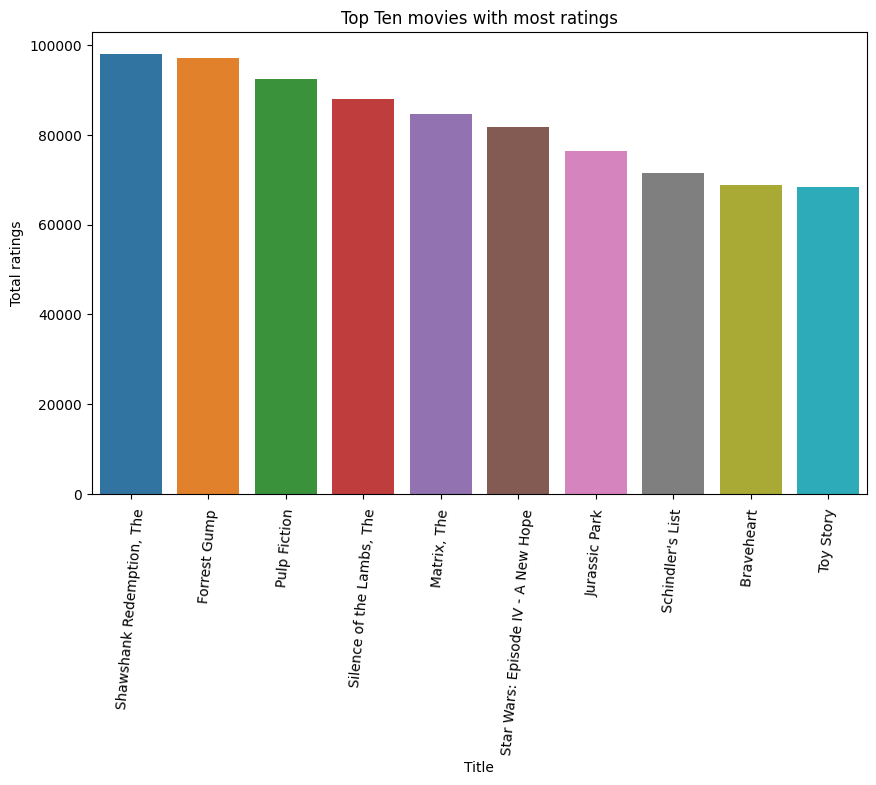

In [303]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
sns.barplot(data=top_ten_most_rate, x="title", y="Total ratings")
ax.tick_params(axis='x', rotation=85)
ax.set(title="Top Ten movies with most ratings", xlabel="Title") 

plt.show();


c) I have answered this question within the dataframe beforehand. I decided to do a column of average rating for all the films in my dataset, so I was able to answer this question.

d)

In [313]:
#total_films_years = df_complete_movie["year"].to_frame("year")
total_films_years = df_complete_movie.groupby(["year"]).count()
total_films_years.head()

,movieId,title,genres,av_rating,Total ratings
year,,,,,
1874,1,1,1,1,1
1878,1,1,1,1,1
1883,1,1,1,1,1
1887,1,1,1,1,1
1888,4,4,4,4,4


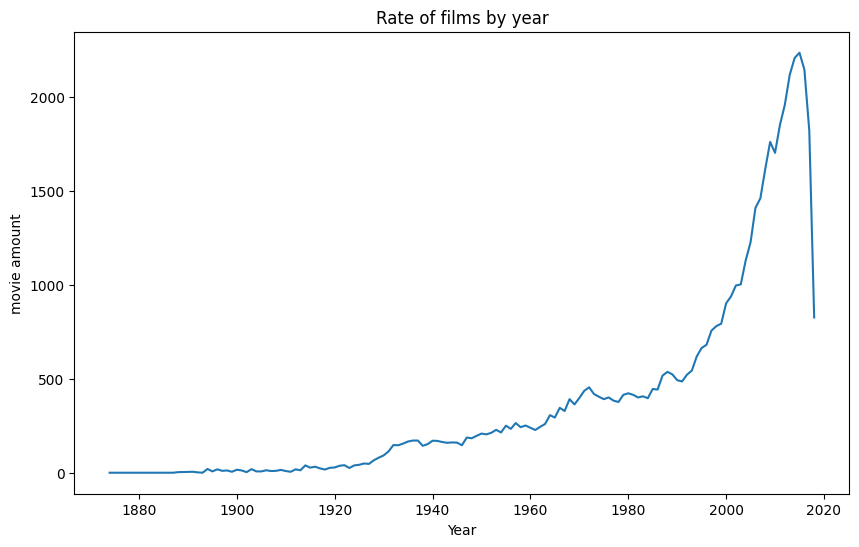

In [311]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
sns.lineplot(data=total_films_years, x="year", y="movieId")
ax.set(title="Rate of films by year", xlabel="Year", ylabel= "movie amount") 

plt.show();